In [177]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [178]:
from fastai.structured import *
from fastai.column_data import *
np.set_printoptions(threshold=50, edgeitems=20)

PATH='data/payments/'

In [179]:
# r_payments = pd.read_csv(f'{PATH}payments.csv', low_memory=False)
# payments = r_payments.loc[r_payments['facility'] == 500140].copy()
# payments.reset_index(inplace=True)

payments = pd.read_csv(f'{PATH}payments.csv', low_memory=False).sort_values(by=['facility', 'date'])


In [180]:
from IPython.display import HTML, display

In [181]:
payments['amount'] = np.round(payments['amount'])


In [182]:
payment_cities = payments['city'].unique()
payment_cities

array(['Oosterhout', 'Amsterdam', 'Veenendaal', 'Gouda', 'Rotterdam', 'Enschede', 'Roosendaal', 'Utrecht',
       'Hengelo', 'Amersfoort', 'Apeldoorn', 'Deventer', 'Breda', 'Nijmegen', 'Naarden', 'Ede', 'Zwolle',
       'Amstelveen', 'Ridderkerk', 'Emmen', ..., 'Woerden', 'Sittard', 'Oisterwijk', 'Den Haag', 'Boxtel',
       'Heerenveen', 'Schiedam', 'Eindhoven', 'Gorinchem', 'Nieuwegein', 'Valkenburg aan de Geul', 'Zutphen',
       'Beverwijk', 'Zwijndrecht', 'Hoofddorp', 'Sneek', 'Driebergen-Rijsenburg', 'Zaandam', 'Weert',
       'Heerlen'], dtype=object)

In [183]:
nl_cities = pd.read_csv(f'{PATH}nl_cities.csv')

In [184]:
payments = payments.merge(nl_cities, 'left', ['city'])

In [185]:
payments[payments.isnull().any(axis=1)].city.unique()

array([], dtype=object)

In [186]:
import time
import datetime

holidays = ['2018-01-01',
            '2018-03-30',
            '2018-04-01',
            '2018-04-02',
            '2018-04-27',
            '2018-05-05',
            '2018-05-10',
            '2018-05-20',
            '2018-05-21',
            '2018-12-25',
            '2018-12-26'
           ]

payments['holiday'] = 0

for d in holidays:
    payments.loc[payments['date'] == d, 'holiday'] = 1
  

In [187]:
display(DataFrameSummary(payments).summary())

,facility,date,city,city_type,facility_purpose,facility_type,amount,region,holiday
count,18972,NaN,NaN,NaN,NaN,NaN,18972,NaN,18972
mean,502992,NaN,NaN,NaN,NaN,NaN,2446.8,NaN,0.0429053
std,2180.13,NaN,NaN,NaN,NaN,NaN,4165.64,NaN,0.202649
min,500140,NaN,NaN,NaN,NaN,NaN,1,NaN,0
25%,501445,NaN,NaN,NaN,NaN,NaN,182,NaN,0
50%,502377,NaN,NaN,NaN,NaN,NaN,683,NaN,0
75%,504092,NaN,NaN,NaN,NaN,NaN,2858,NaN,0
max,510842,NaN,NaN,NaN,NaN,NaN,67192,NaN,1
counts,18972,18972,18972,18972,18972,18972,18972,18972,18972
uniques,108,182,58,1,3,5,6071,3,2


In [188]:
nl_school_holidays = pd.read_csv(f'{PATH}nl_school_holidays.csv')
nl_school_holidays



,region,begin,end
0,North,2017-12-23,2018-01-07
1,South,2017-12-23,2018-01-07
2,Middle,2017-12-23,2018-01-07
3,North,2018-02-24,2018-03-04
4,Middle,2018-02-24,2018-03-04
5,South,2018-02-17,2018-02-25
6,North,2018-04-28,2018-06-06
7,Middle,2018-04-28,2018-06-06
8,South,2018-04-28,2018-06-06
9,North,2018-07-21,2018-09-02


In [189]:
payments['school_holiday'] = 0

for [r, b, e] in nl_school_holidays.values:
    payments.loc[(payments["region"] == r) & (payments["date"] >= b) & (payments["date"] <= e), "school_holiday"] = 1


In [190]:
display(DataFrameSummary(payments).summary())

,facility,date,city,city_type,facility_purpose,facility_type,amount,region,holiday,school_holiday
count,18972,NaN,NaN,NaN,NaN,NaN,18972,NaN,18972,18972
mean,502992,NaN,NaN,NaN,NaN,NaN,2446.8,NaN,0.0429053,0.459045
std,2180.13,NaN,NaN,NaN,NaN,NaN,4165.64,NaN,0.202649,0.498333
min,500140,NaN,NaN,NaN,NaN,NaN,1,NaN,0,0
25%,501445,NaN,NaN,NaN,NaN,NaN,182,NaN,0,0
50%,502377,NaN,NaN,NaN,NaN,NaN,683,NaN,0,0
75%,504092,NaN,NaN,NaN,NaN,NaN,2858,NaN,0,1
max,510842,NaN,NaN,NaN,NaN,NaN,67192,NaN,1,1
counts,18972,18972,18972,18972,18972,18972,18972,18972,18972,18972
uniques,108,182,58,1,3,5,6071,3,2,2


In [191]:
add_datepart(payments, "date", drop=False)

In [192]:
# throw away last few days
# from datetime import datetime, timedelta
# max_date = payments['date'].max()
# max_date = max_date - timedelta(days=3)

# payments = payments.loc[payments.date < max_date]
# payments.reset_index(inplace=True)


In [193]:
import datetime
import calendar

def week_of_month(tgtdate):
    #tgtdate = tgtdate.to_datetime()

    days_this_month = calendar.mdays[tgtdate.month]
    for i in range(1, days_this_month):
        d = datetime.datetime(tgtdate.year, tgtdate.month, i)
        if d.day - d.weekday() > 0:
            startdate = d
            break
    # now we can use the modulo 7 appraoch
    mod = (tgtdate - startdate).days //7 + 1
    return max(mod, 1)

payments['wom'] = payments['date'].apply(week_of_month)

In [194]:
display(payments.head())

,facility,date,city,city_type,facility_purpose,facility_type,amount,region,holiday,school_holiday,...,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed,wom
0,500140,2018-03-14,Oosterhout,ACities,Multifunction,Combination,1268.0,South,0,0,...,2,73,False,False,False,False,False,False,1520985600,2
1,500140,2018-03-15,Oosterhout,ACities,Multifunction,Combination,1119.0,South,0,0,...,3,74,False,False,False,False,False,False,1521072000,2
2,500140,2018-03-16,Oosterhout,ACities,Multifunction,Combination,2461.0,South,0,0,...,4,75,False,False,False,False,False,False,1521158400,2
3,500140,2018-03-17,Oosterhout,ACities,Multifunction,Combination,2986.0,South,0,0,...,5,76,False,False,False,False,False,False,1521244800,2
4,500140,2018-03-18,Oosterhout,ACities,Multifunction,Combination,31.0,South,0,0,...,6,77,False,False,False,False,False,False,1521331200,2


In [195]:
len(payments)

18972

In [196]:
def get_elapsed(fld, pre):
    day1 = np.timedelta64(1, 'D')
    last_date = np.datetime64()
    last_store = 0
    res = []

    for s,v,d in zip(df.facility.values,df[fld].values, df.date.values):
        if s != last_store:
            last_date = np.datetime64()
            last_store = s
        if v: last_date = d
        res.append(((d-last_date).astype('timedelta64[D]') / day1))
    df[pre+fld] = res
    



In [197]:
columns = ["date", "facility", "holiday", "school_holiday"]    
df = payments[columns]

fld = 'holiday'
df = df.sort_values(['facility', 'date'])
get_elapsed(fld, 'after_')
df = df.sort_values(['facility', 'date'], ascending=[True, False])
get_elapsed(fld, 'before_')

fld = 'school_holiday'
df = df.sort_values(['facility', 'date'])
get_elapsed(fld, 'after_')
df = df.sort_values(['facility', 'date'], ascending=[True, False])
get_elapsed(fld, 'before_')


# We're going to set the active index to Date.
df = df.set_index("date")

# Then set null values from elapsed field calculations to 0.
columns = ['holiday', 'school_holiday']
for o in ['before_', 'after_']:
    for p in columns:
        a = o+p
        df[a] = df[a].fillna(0).astype(int)

# rolling quantities        
bwd = df[['facility']+columns].sort_index().groupby("facility").rolling(7, min_periods=1).sum()        
fwd = df[['facility']+columns].sort_index(ascending=False).groupby("facility").rolling(7, min_periods=1).sum()

# drop the facility indices grouped together in the window function
bwd.drop('facility',1,inplace=True)
bwd.reset_index(inplace=True)
fwd.drop('facility',1,inplace=True)
fwd.reset_index(inplace=True)





In [198]:
df.reset_index(inplace=True)

df = df.merge(bwd, 'left', ['date', 'facility'], suffixes=['', '_bw'])
df = df.merge(fwd, 'left', ['date', 'facility'], suffixes=['', '_fw'])
df.drop(columns,1,inplace=True)
len(df)

# payments.reset_index(inplace=True)
# payments = payments.merge(bwd, 'left', ['date', 'facility'], suffixes=['', '_bw'])
# payments = payments.merge(fwd, 'left', ['date', 'facility'], suffixes=['', '_fw'])
# payments.drop(columns,1,inplace=True)
# display(payments.columns)

20052

In [199]:
def join_df(left, right, left_on, right_on=None, suffix='_y'):
    if right_on is None: right_on = left_on
    return left.merge(right, how='left', left_on=left_on, right_on=right_on, 
                      suffixes=("", suffix))

In [200]:
payments = join_df(payments, df, ['facility', 'date'])

#######
### why do we have duplicates??????

payments = payments.drop_duplicates()



In [217]:
payments.reset_index(inplace=True)

In [218]:
display(payments[payments.date == '2018-04-28'])

,index,facility,date,city,city_type,facility_purpose,facility_type,amount,region,holiday,...,Elapsed,wom,after_holiday,before_holiday,after_school_holiday,before_school_holiday,holiday_bw,school_holiday_bw,holiday_fw,school_holiday_fw
44,44,500140,2018-04-28,Oosterhout,ACities,Multifunction,Combination,2862.0,South,0,...,1524873600,4,1,-7,0,0,1.0,1.0,0.0,7.0
198,198,500165,2018-04-28,Amsterdam,ACities,Multifunction,Combination,7025.0,North,0,...,1524873600,4,1,-7,0,0,1.0,1.0,0.0,7.0
377,377,500181,2018-04-28,Veenendaal,ACities,Multifunction,Combination,11331.0,Middle,0,...,1524873600,4,1,-7,0,0,1.0,1.0,0.0,7.0
557,557,500223,2018-04-28,Gouda,ACities,Multifunction,Combination,6578.0,Middle,0,...,1524873600,4,1,-7,0,0,1.0,1.0,0.0,7.0
737,737,500280,2018-04-28,Rotterdam,ACities,Multifunction,Combination,8042.0,Middle,0,...,1524873600,4,1,-7,0,0,1.0,1.0,0.0,7.0
917,917,500348,2018-04-28,Enschede,ACities,Multifunction,Combination,5817.0,North,0,...,1524873600,4,1,-7,0,0,1.0,1.0,0.0,7.0
1097,1097,500652,2018-04-28,Roosendaal,ACities,Multifunction,Combination,138.0,South,0,...,1524873600,4,1,-7,0,0,1.0,1.0,0.0,7.0
1277,1277,500660,2018-04-28,Utrecht,ACities,Multifunction,Combination,2253.0,Middle,0,...,1524873600,4,1,-7,0,0,1.0,1.0,0.0,7.0
1456,1456,500702,2018-04-28,Hengelo,ACities,Multifunction,Combination,70.0,North,0,...,1524873600,4,1,-7,0,0,1.0,1.0,0.0,7.0
1632,1632,500736,2018-04-28,Amsterdam,ACities,Multifunction,Combination,25790.0,North,0,...,1524873600,4,1,-7,0,0,1.0,1.0,0.0,7.0


In [219]:
print(len(payments))
print(len(payments.drop_duplicates()))

19084
19084


In [220]:
payments.columns

Index(['index', 'facility', 'date', 'city', 'city_type', 'facility_purpose',
       'facility_type', 'amount', 'region', 'holiday', 'school_holiday',
       'Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
       'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start',
       'Is_year_end', 'Is_year_start', 'Elapsed', 'wom', 'after_holiday',
       'before_holiday', 'after_school_holiday', 'before_school_holiday',
       'holiday_bw', 'school_holiday_bw', 'holiday_fw', 'school_holiday_fw'],
      dtype='object')

In [221]:
cat_vars = ['facility', 
            'city', 
            'facility_purpose',
            'facility_type', 
            'Day', 
            'Dayofweek', 
            'Is_month_end', 
            'Is_month_start', 
            'holiday',
            'wom',
            'region',
            'school_holiday'
        ] 

contin_vars = ['after_holiday', 'before_holiday', 'holiday_bw',
       'holiday_fw', 'after_school_holiday',
       'before_school_holiday', 'school_holiday_bw', 'school_holiday_fw']
dep = 'amount'

In [222]:
payments_cat = payments[cat_vars+contin_vars+[dep, 'date']].copy()

In [223]:
for v in cat_vars: 
    payments_cat[v] = payments_cat[v].astype('category').cat.as_ordered()


In [224]:
payments_cat = payments_cat.set_index("date")
payments_cat.head()

,facility,city,facility_purpose,facility_type,Day,Dayofweek,Is_month_end,Is_month_start,holiday,wom,...,school_holiday,after_holiday,before_holiday,holiday_bw,holiday_fw,after_school_holiday,before_school_holiday,school_holiday_bw,school_holiday_fw,amount
date,,,,,,,,,,,,,,,,,,,,,
2018-03-14,500140,Oosterhout,Multifunction,Combination,14,2,False,False,0,2,...,0,0,-16,0.0,0.0,0,-45,0.0,0.0,1268.0
2018-03-15,500140,Oosterhout,Multifunction,Combination,15,3,False,False,0,2,...,0,0,-15,0.0,0.0,0,-44,0.0,0.0,1119.0
2018-03-16,500140,Oosterhout,Multifunction,Combination,16,4,False,False,0,2,...,0,0,-14,0.0,0.0,0,-43,0.0,0.0,2461.0
2018-03-17,500140,Oosterhout,Multifunction,Combination,17,5,False,False,0,2,...,0,0,-13,0.0,0.0,0,-42,0.0,0.0,2986.0
2018-03-18,500140,Oosterhout,Multifunction,Combination,18,6,False,False,0,2,...,0,0,-12,0.0,0.0,0,-41,0.0,0.0,31.0


In [225]:
df, y, nas, mapper = proc_df(payments_cat, 'amount', do_scale=True)

In [226]:
df.head()

,facility,city,facility_purpose,facility_type,Day,Dayofweek,Is_month_end,Is_month_start,holiday,wom,region,school_holiday,after_holiday,before_holiday,holiday_bw,holiday_fw,after_school_holiday,before_school_holiday,school_holiday_bw,school_holiday_fw
date,,,,,,,,,,,,,,,,,,,,
2018-03-14,1,40,2,2,14,3,1,1,1,2,3,1,-1.031426,-2.349363,-0.445221,-0.445221,-0.498818,-2.508923,-0.974535,-0.975198
2018-03-15,1,40,2,2,15,4,1,1,1,2,3,1,-1.031426,-2.170578,-0.445221,-0.445221,-0.498818,-2.437424,-0.974535,-0.975198
2018-03-16,1,40,2,2,16,5,1,1,1,2,3,1,-1.031426,-1.991794,-0.445221,-0.445221,-0.498818,-2.365925,-0.974535,-0.975198
2018-03-17,1,40,2,2,17,6,1,1,1,2,3,1,-1.031426,-1.813009,-0.445221,-0.445221,-0.498818,-2.294426,-0.974535,-0.975198
2018-03-18,1,40,2,2,18,7,1,1,1,2,3,1,-1.031426,-1.634225,-0.445221,-0.445221,-0.498818,-2.222926,-0.974535,-0.975198


In [227]:
y

array([1268., 1119., 2461., 2986.,   31.,  690., 1030., 1417., 1260., 2488., 2698.,  697.,  650., 1347.,
       2022., 1306., 2263., 2977.,    8.,  114., ..., 3907., 4282., 6531., 2811., 2880., 3222., 3597., 4167.,
       4097., 4793., 3279., 1762., 2888., 2564., 3224., 3632., 5371., 2449., 1502., 2598.])

In [228]:
yl = np.log(y)
yl

array([7.1452 , 7.02019, 7.80832, 8.00169, 3.43399, 6.53669, 6.93731, 7.2563 , 7.13887, 7.81923, 7.90027,
       6.54679, 6.47697, 7.20564, 7.61184, 7.17472, 7.72445, 7.99867, 2.07944, 4.7362 , ..., 8.27053,
       8.36218, 8.78432, 7.9413 , 7.96555, 8.07776, 8.18786, 8.33495, 8.31801, 8.47491, 8.09529, 7.4742 ,
       7.96832, 7.84932, 8.07838, 8.19754, 8.58877, 7.80344, 7.31455, 7.8625 ])

In [229]:
min_date = payments['date'].min()
max_date = payments['date'].max()

# 6 month of data
break_point = max_date - ((max_date - min_date) / 12) 

val_selection = payments[payments.date > break_point]
# val_selection = val_selection[val_selection.facility == 504480]


val_idx = val_selection.index

val_idx





Int64Index([  153,   317,   318,   319,   320,   321,   322,   323,   324,
              325,
            ...
            19074, 19075, 19076, 19077, 19078, 19079, 19080, 19081, 19082,
            19083],
           dtype='int64', length=1715)

In [230]:
# train_ratio = 0.75
# train_ratio = 0.9
# train_size = int(len(df) * train_ratio)
# val_idx = list(range(train_size, len(df)))

In [231]:
def inv_y(a): return np.exp(a)

def exp_rmspe(y_pred, targ):
    itarg = inv_y(targ)
    ipred = inv_y(y_pred)
    pct_var = (itarg - ipred)/itarg
    return math.sqrt((pct_var**2).mean())

def exp_rmse(y_pred, targ):
    itarg = inv_y(targ)
    ipred = inv_y(y_pred)
    var = itarg - ipred
    return math.sqrt((var**2).mean())

def exp_mae(y_pred, targ):
    itarg = inv_y(targ)
    ipred = inv_y(y_pred)
    return np.abs(itarg - ipred).mean()




def rmspe(y_pred, targ):
    pct_var = (targ - y_pred)/targ
    return math.sqrt((pct_var**2).mean())

def rmse(y_pred, targ):
    var = targ - y_pred
    return math.sqrt((var**2).mean())

def mae(y_pred, targ):
    return np.abs(targ - y_pred).mean()



max_log_y = np.max(yl)
y_range = (0, np.max(y)*1.5)
yl_range = (0, max_log_y*1.2)

In [232]:
md = ColumnarModelData.from_data_frame(PATH, val_idx, df, yl.astype(np.float32), cat_flds=cat_vars, bs=128,
                                       test_df=None)

In [233]:
cat_sz = [(c, len(payments_cat[c].cat.categories)+1) for c in cat_vars]

In [234]:
cat_sz

[('facility', 109),
 ('city', 59),
 ('facility_purpose', 4),
 ('facility_type', 6),
 ('Day', 32),
 ('Dayofweek', 8),
 ('Is_month_end', 3),
 ('Is_month_start', 3),
 ('holiday', 3),
 ('wom', 6),
 ('region', 4),
 ('school_holiday', 3)]

In [235]:
emb_szs = [(c, min(50, (c+1)//2)) for _,c in cat_sz]

In [236]:
emb_szs

[(109, 50),
 (59, 30),
 (4, 2),
 (6, 3),
 (32, 16),
 (8, 4),
 (3, 2),
 (3, 2),
 (3, 2),
 (6, 3),
 (4, 2),
 (3, 2)]

In [237]:
layers = [1000, 500]

m = md.get_learner(emb_szs, 
                   len(df.columns)-len(cat_vars),
                   0, 1, layers, [0., 0., 0.], yl_range, use_bn=False)

In [238]:
m.lr_find()

 75%|███████▌  | 102/136 [00:01<00:00, 62.73it/s, loss=6.42]


In [239]:
m

MixedInputModel(
  (embs): ModuleList(
    (0): Embedding(109, 50)
    (1): Embedding(59, 30)
    (2): Embedding(4, 2)
    (3): Embedding(6, 3)
    (4): Embedding(32, 16)
    (5): Embedding(8, 4)
    (6): Embedding(3, 2)
    (7): Embedding(3, 2)
    (8): Embedding(3, 2)
    (9): Embedding(6, 3)
    (10): Embedding(4, 2)
    (11): Embedding(3, 2)
  )
  (lins): ModuleList(
    (0): Linear(in_features=126, out_features=1000, bias=True)
    (1): Linear(in_features=1000, out_features=500, bias=True)
  )
  (bns): ModuleList(
    (0): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True)
    (1): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True)
  )
  (outp): Linear(in_features=500, out_features=1, bias=True)
  (emb_drop): Dropout(p=0)
  (drops): ModuleList(
    (0): Dropout(p=0.0)
    (1): Dropout(p=0.0)
    (2): Dropout(p=0.0)
  )
  (bn): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True)
)

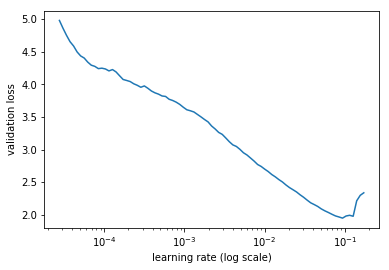

In [240]:
m.sched.plot()

In [246]:
m = md.get_learner(emb_szs, 
                   len(df.columns)-len(cat_vars),
                   0., 1, layers, [0.1, 0.01, 0.], yl_range, use_bn=False)

lr = 1e-2
m.fit(lr, 4, metrics=[exp_rmspe, exp_mae], cycle_len=3)
#m.fit(lr, 4, metrics=[exp_rmspe], cycle_len=3)



epoch      trn_loss   val_loss   exp_rmspe  exp_mae          
    0      0.897419   0.312771   1.2134     850.305064
    1      0.436823   0.29501    1.166068   876.810056       
    2      0.366556   0.270111   1.032539   755.803548       
    3      0.346532   0.258794   0.883117   621.001223       
    4      0.271387   0.25851    0.91095    759.486137       
    5      0.240695   0.281308   1.172594   672.687242       
    6      0.308607   0.320361   1.481629   881.98307        
    7      0.252506   0.27746    1.170042   623.632405       
    8      0.221674   0.313132   1.299306   735.644669       
    9      0.267673   0.307682   1.332711   903.589749       
    10     0.230631   0.305665   1.116488   631.897615       
    11     0.198947   0.323648   1.292765   679.537494       


[array([0.32365]), 1.2927653375056634, 679.53749431966]

In [ ]:
m.fit(lr, 100, metrics=[exp_rmspe, exp_mae], cycle_len=3)

In [ ]:
y_hat,y=np.exp(m.predict_with_targs())

In [ ]:
z = np.array(list(zip(y_hat, y)))

z


In [ ]:
facility_payments = []
for idx in val_idx:
    p = payments.loc[idx]
    if (p.facility == 500165):
        facility_payments.append(p.amount)
        
len(facility_payments)
facility_payments



In [ ]:
z[1:9]

In [ ]:
np.exp(m.predict())